In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt

In [2]:
input_file_aggr = 'Weighted_paths_0.65_aggr' # this is the 'output_file_1.evaluated.filtered_0.67' file
input_file_non_aggr = 'Weighted_paths_0.65_non_aggr'
ranking_file_aggr = './ranks/alpha_0.65_aggr.desc'
ranking_file_non_aggr = './ranks/alpha_0.65_non_aggr.desc'
N_aggr = 100
N_non_aggr = 100
# Only a gene that is in the top N of aggresive or non-aggresive (or both) is considered
output_file = 'subnetwork_0.65_difference_aggr_non_aggr'+str(N_aggr)+'_'+str(N_non_aggr)+'weighted'+'.js'
output_file_components_directory = './components/subnetwork_0.65_difference_aggr_non_aggr'+str(N_aggr)+'_'+str(N_non_aggr)+'weighted'+'/'

In [3]:
df_aggr = pd.read_csv(input_file_aggr,sep='[',skiprows=0,header=None)

In [4]:
df_non_aggr = pd.read_csv(input_file_non_aggr,sep='[',skiprows=0,header=None)

In [5]:
def ParseDataframe(df):
    df = df.rename(columns={0: 'path_weight', 1: 'genes_path'})
    df[['gene1','gene2','gene3']] = df['genes_path'].str.split(',',expand=True)
    df[['gene3','brol']] = df['gene3'].str.split(']',expand=True)
    df = df.drop(['brol','genes_path'], axis=1)
    df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)
    df = df.drop(['brol'], axis=1)
    return df

In [6]:
df_aggr = ParseDataframe(df_aggr)
df_aggr

/tmp/ipykernel_25286/683794502.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)


,path_weight,gene1,gene2,gene3
0,1.7322998022917186e-8,'PAX6','EP300','TP53'
1,1.7323238772186547e-8,'IL24','EP300','TP53'
2,1.7324057976133982e-8,'TFDP1','EP300','TP53'
3,1.7324695284240434e-8,'KDM6A','EP300','TP53'
4,1.7326760615258647e-8,'RUNX3','EP300','TP53'
...,...,...,...,...
1013381,0.0025958440517985294,'UNC80','UNC79','NALCN'
1013382,0.0028037542002097835,'UNC79','UNC80','NALCN'
1013383,0.003029369256441584,'GPLD1','NTNG1','LRRC4C'
1013384,0.003029369256441584,'NGL1','NTNG1','LRRC4C'


In [7]:
gene1 = df_aggr['gene1'].tolist()
gene2 = df_aggr['gene2'].tolist()
gene3 = df_aggr['gene3'].tolist()
df_aggr_edges = pd.DataFrame(columns = ['Node1', 'Node2'])
for i in range(10000):
    G = []
    G.append(gene1[i])
    G.append(gene2[i])
    G.append(gene3[i])
    G = sorted(G)
    df_aggr_edges.loc[len(df_aggr_edges)] = [G[0],G[1]]
    df_aggr_edges.loc[len(df_aggr_edges)] = [G[1],G[2]]
    df_aggr_edges.loc[len(df_aggr_edges)] = [G[0],G[2]] 
df_aggr_edges = df_aggr_edges.drop_duplicates()
correction_factor_weighted_paths_aggr = (df_aggr_edges.size/10000)/3
print(correction_factor_weighted_paths_aggr)

0.6449333333333334


In [8]:
df_non_aggr = ParseDataframe(df_non_aggr)
df_non_aggr

/tmp/ipykernel_25286/683794502.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)


,path_weight,gene1,gene2,gene3
0,4.184882318703e-9,'COMP','EP300','CDH1'
1,4.184882318703e-9,'FLT1','EP300','CDH1'
2,4.187393771039999e-9,'P2RX5','EP300','CDH1'
3,4.248779920616186e-9,'TF','EP300','CDH1'
4,4.265261711575665e-9,'KRT18','EP300','CDH1'
...,...,...,...,...
5425865,0.00038982181481676706,'EP300','LCN2','SLC22A17'
5425866,0.0003910217834576785,'UNC80','NALCN','UNC79'
5425867,0.00039490694549038113,'EP300','OPA1','OMA1'
5425868,0.00039673514394162403,'UNC80','UNC79','NALCN'


In [9]:
gene1 = df_non_aggr['gene1'].tolist()
gene2 = df_non_aggr['gene2'].tolist()
gene3 = df_non_aggr['gene3'].tolist()
df_non_aggr_edges = pd.DataFrame(columns = ['Node1', 'Node2'])
for i in range(10000):
    G = []
    G.append(gene1[i])
    G.append(gene2[i])
    G.append(gene3[i])
    G = sorted(G)
    df_non_aggr_edges.loc[len(df_non_aggr_edges)] = [G[0],G[1]]
    df_non_aggr_edges.loc[len(df_non_aggr_edges)] = [G[1],G[2]]
    df_non_aggr_edges.loc[len(df_non_aggr_edges)] = [G[0],G[2]] 
df_non_aggr_edges = df_non_aggr_edges.drop_duplicates()
correction_factor_weighted_paths_non_aggr = (df_non_aggr_edges.size/10000)/3
print(correction_factor_weighted_paths_non_aggr)

0.8484666666666666


In [10]:
df_ranking_aggr = pd.read_csv(ranking_file_aggr,sep='[',skiprows=0,header=None)
df_ranking_non_aggr = pd.read_csv(ranking_file_non_aggr,sep='[',skiprows=0,header=None)

In [11]:
ranking_genes_aggr = df_ranking_aggr[0].values.tolist()
ranking_genes_non_aggr = df_ranking_non_aggr[0].values.tolist()
df_ranking_top_aggr = df_ranking_aggr[0:N_aggr]
df_ranking_top_non_aggr = df_ranking_non_aggr[0:N_non_aggr]
top_genes_aggr = df_ranking_top_aggr[0].values.tolist()
top_genes_non_aggr = df_ranking_top_non_aggr[0].values.tolist()
top_genes2_aggr = []
top_genes2_non_aggr = []
for i in top_genes_aggr:
    a = '\''+i+'\''
    top_genes2_aggr.append(a)
for i in top_genes_non_aggr:
    a = '\''+i+'\''
    top_genes2_non_aggr.append(a)

In [12]:
top_genes_together = []
for i in top_genes_aggr:
    top_genes_together.append(i)
for i in top_genes_non_aggr:
    if i not in top_genes_together:
        top_genes_together.append(i)
        
top_genes2_together = []
for i in top_genes2_aggr:
    top_genes2_together.append(i)
for i in top_genes2_non_aggr:
    if i not in top_genes2_together:
        top_genes2_together.append(i)

In [13]:
print(len(top_genes_aggr))
print(len(top_genes_non_aggr))
print(len(top_genes_together))
top_genes_together

100
100
191


['TP53',
 'ACTG1',
 'PGR',
 'EGFR',
 'HSPA8',
 'POLR2B',
 'PLCB4',
 'DCN',
 'PCDHA1',
 'ATM',
 'APOB',
 'ITGAM',
 'PCDHA9',
 'FAT2',
 'HSPG2',
 'MUC16',
 'PCDH10',
 'PCDHB7',
 'IRF4',
 'BMPR2',
 'TUBB4A',
 'FGA',
 'COL1A2',
 'MMP9',
 'KMT2D',
 'ERCC2',
 'GAB2',
 'EPHB1',
 'GLI3',
 'FOS',
 'TSC2',
 'COL11A1',
 'MYH11',
 'SPTA1',
 'IL6ST',
 'NR1D1',
 'EPB41L3',
 'ADCY2',
 'AAK1',
 'TRRAP',
 'POM121C',
 'LIMK1',
 'UNC80',
 'UNC79',
 'NALCN',
 'PI4KA',
 'MED12',
 'BRAF',
 'BSN',
 'KRT27',
 'RGMB',
 'ANAPC5',
 'NPHP1',
 'RYR1',
 'PHC1',
 'NTNG1',
 'SYT9',
 'CACNA1E',
 'FLG',
 'CDH6',
 'SPOP',
 'KCND3',
 'PDLIM5',
 'DCHS2',
 'FAT4',
 'NABP1',
 'BRIP1',
 'DSEL',
 'PKD1',
 'OR5M8',
 'OR5D13',
 'OR2AE1',
 'USP9X',
 'OR52A1',
 'CPT1A',
 'LRP1B',
 'PFKP',
 'EIF4G3',
 'PAPPA2',
 'SCN7A',
 'OSCAR',
 'EP300',
 'CAMTA1',
 'ESR1',
 'GNL3',
 'BBS9',
 'ADAM23',
 'STRN3',
 'SV2A',
 'NFKBIZ',
 'MAP2',
 'DHTKD1',
 'MOGAT2',
 'CUBN',
 'DYNC1H1',
 'CEBPZ',
 'P2RX1',
 'GGT5',
 'PRKACA',
 'P2RX4',
 'STAT1',
 '

In [14]:
df_final_aggr = df_aggr[(df_aggr['gene1'].isin(top_genes2_together) & df_aggr['gene2'].isin(top_genes2_together)) | (df_aggr['gene1'].isin(top_genes2_together) & df_aggr['gene3'].isin(top_genes2_together))|(df_aggr['gene2'].isin(top_genes2_together) & df_aggr['gene3'].isin(top_genes2_together))]
df_final_aggr

,path_weight,gene1,gene2,gene3
0,1.7322998022917186e-8,'PAX6','EP300','TP53'
1,1.7323238772186547e-8,'IL24','EP300','TP53'
2,1.7324057976133982e-8,'TFDP1','EP300','TP53'
3,1.7324695284240434e-8,'KDM6A','EP300','TP53'
4,1.7326760615258647e-8,'RUNX3','EP300','TP53'
...,...,...,...,...
1013380,0.0012597073377684923,'NALCN','UNC80','UNC79'
1013381,0.0025958440517985294,'UNC80','UNC79','NALCN'
1013382,0.0028037542002097835,'UNC79','UNC80','NALCN'
1013383,0.003029369256441584,'GPLD1','NTNG1','LRRC4C'


In [15]:
df_final_non_aggr = df_non_aggr[(df_non_aggr['gene1'].isin(top_genes2_together) & df_non_aggr['gene2'].isin(top_genes2_together)) | (df_non_aggr['gene1'].isin(top_genes2_together) & df_non_aggr['gene3'].isin(top_genes2_together)) | (df_non_aggr['gene2'].isin(top_genes2_together) & df_non_aggr['gene3'].isin(top_genes2_together))]
df_final_non_aggr

,path_weight,gene1,gene2,gene3
0,4.184882318703e-9,'COMP','EP300','CDH1'
1,4.184882318703e-9,'FLT1','EP300','CDH1'
2,4.187393771039999e-9,'P2RX5','EP300','CDH1'
3,4.248779920616186e-9,'TF','EP300','CDH1'
4,4.265261711575665e-9,'KRT18','EP300','CDH1'
...,...,...,...,...
5425861,0.0003231084477482441,'UNC79','UNC80','NALCN'
5425862,0.0003249753509316557,'GPLD1','NTNG1','LRRC4C'
5425863,0.00032937221159395024,'NALCN','UNC80','UNC79'
5425866,0.0003910217834576785,'UNC80','NALCN','UNC79'


In [16]:
def calculateEdges(df,df_final,top_genes,top_genes2,weighted,weight):
    edges = {}
    Normalization = sum(df['path_weight'].astype(float)) # Explained in the paper of OMEN
    for i in range(len(top_genes)):
        print(i)
        for j in range(len(top_genes)-1-i):
            node1 = top_genes[i]
            node2 = top_genes[i+1+j]
            nodes = []
            nodes.append(top_genes2[i])
            nodes.append(top_genes2[i+1+j])
            df_edge = df_final[ (df_final['gene1'].isin(nodes) & df_final['gene2'].isin(nodes)) | (df_final['gene1'].isin(nodes) & df_final['gene3'].isin(nodes)) | (df_final['gene2'].isin(nodes) & df_final['gene3'].isin(nodes))]
            s = sum(df_edge['path_weight'].astype(float))/Normalization
            if s>0:
                if weighted:
                    edges[(node1,node2)] = s*weight
                else:
                    edges[(node1,node2)] = s*100000 # to have bigger values, because they are small probabilities                
    return edges 

In [17]:
edges_aggr = calculateEdges(df_aggr,df_final_aggr,top_genes_together,top_genes2_together,True,df_aggr.size*correction_factor_weighted_paths_aggr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


In [18]:
edges_non_aggr = calculateEdges(df_non_aggr,df_final_non_aggr,top_genes_together,top_genes2_together,True,df_non_aggr.size*correction_factor_weighted_paths_non_aggr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


In [19]:
edges_aggr

{('TP53', 'ACTG1'): 16.595844421281875,
 ('TP53', 'PGR'): 103.028179104834,
 ('TP53', 'EGFR'): 551.3724929603088,
 ('TP53', 'HSPA8'): 14.718433867379028,
 ('TP53', 'POLR2B'): 44.662608673917966,
 ('TP53', 'PLCB4'): 6.4427080262551515,
 ('TP53', 'DCN'): 29.234378153083533,
 ('TP53', 'PCDHA1'): 0.7741600347471185,
 ('TP53', 'ATM'): 1002.897667392125,
 ('TP53', 'APOB'): 13.087061778205387,
 ('TP53', 'ITGAM'): 6.0023283643744625,
 ('TP53', 'PCDHA9'): 0.8096683404580373,
 ('TP53', 'FAT2'): 0.8322108709776035,
 ('TP53', 'HSPG2'): 80.28829020109457,
 ('TP53', 'PCDH10'): 0.8147439221112509,
 ('TP53', 'PCDHB7'): 0.8131572168532288,
 ('TP53', 'IRF4'): 57.316695800822096,
 ('TP53', 'BMPR2'): 32.285154713129316,
 ('TP53', 'TUBB4A'): 35.10236953005328,
 ('TP53', 'FGA'): 4.37147039014177,
 ('TP53', 'COL1A2'): 5.715358741903001,
 ('TP53', 'MMP9'): 31.03707246824923,
 ('TP53', 'KMT2D'): 60.24247355919726,
 ('TP53', 'ERCC2'): 84.80785973682607,
 ('TP53', 'GAB2'): 6.825423835993674,
 ('TP53', 'EPHB1'): 

In [20]:
edges_non_aggr

{('TP53', 'EGFR'): 616.5688144986641,
 ('TP53', 'PLCB4'): 3.2856484502645675,
 ('TP53', 'ATM'): 1162.8860925307893,
 ('TP53', 'APOB'): 7.60727115698489,
 ('TP53', 'ITGAM'): 3.6087679624449276,
 ('TP53', 'PCDHA9'): 0.5830775883067784,
 ('TP53', 'FAT2'): 0.5805234870302589,
 ('TP53', 'HSPG2'): 53.17333632704144,
 ('TP53', 'PCDH10'): 0.5633752510916787,
 ('TP53', 'PCDHB7'): 0.5566746118196982,
 ('TP53', 'IRF4'): 38.586018772394624,
 ('TP53', 'BMPR2'): 20.344404072703295,
 ('TP53', 'FGA'): 2.7013267359228306,
 ('TP53', 'MMP9'): 19.779768785723952,
 ('TP53', 'KMT2D'): 35.39289379594533,
 ('TP53', 'EPHB1'): 6.280599711445923,
 ('TP53', 'FOS'): 1010.2103663559582,
 ('TP53', 'TSC2'): 611.0952209029222,
 ('TP53', 'COL11A1'): 2.1386552407996087,
 ('TP53', 'SPTA1'): 0.5833784840805204,
 ('TP53', 'IL6ST'): 5.618922651630979,
 ('TP53', 'TRRAP'): 1025.9268603742923,
 ('TP53', 'LIMK1'): 25.45971075510217,
 ('TP53', 'PI4KA'): 3.1812358250036863,
 ('TP53', 'MED12'): 6.261004515461683,
 ('TP53', 'BRAF')

In [21]:
print(len(edges_aggr))
print(len(edges_non_aggr))

5744
6486


In [22]:
sum_edges_aggr = 0
sum_edges_non_aggr = 0
for i in edges_aggr:
    sum_edges_aggr = sum_edges_aggr + edges_aggr[i]
for i in edges_non_aggr:
    sum_edges_non_aggr = sum_edges_non_aggr + edges_non_aggr[i]
print('Aggressive:')
print(len(edges_aggr))
print(sum_edges_aggr)
print(sum_edges_aggr/len(edges_aggr))
print('Non-aggressive:')
print(len(edges_non_aggr))
print(sum_edges_non_aggr)
print(sum_edges_non_aggr/len(edges_non_aggr))

Aggressive:
5744
681109.5347981937
118.57756525038191
Non-aggressive:
6486
913185.392837732
140.79330756055072


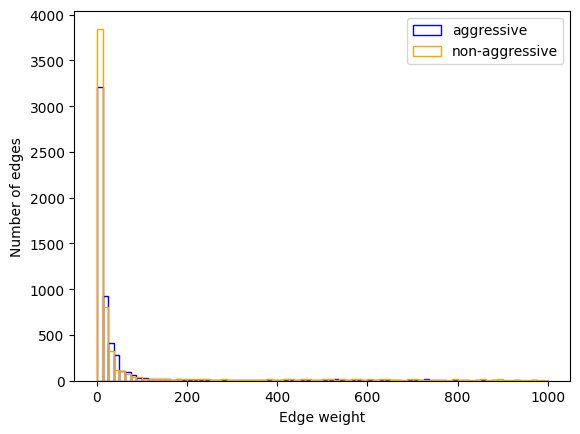

In [23]:
edge_aggr_weights = list(edges_aggr.values())
edge_non_aggr_weights = list(edges_non_aggr.values())
plt.hist(edge_aggr_weights,bins=80,range=[0,1000],edgecolor='blue',fill=False,label='aggressive')
plt.hist(edge_non_aggr_weights,bins=80,range=[0,1000],edgecolor='orange',fill=False,label='non-aggressive')
plt.xlabel('Edge weight')
plt.ylabel('Number of edges')
plt.legend()
plt.savefig('Density_edge_weight_100_100_weighted.png')

In [24]:
edges_difference_weight = {} # weight = weight aggressive - weight non-aggressive
with open('overview_edge_weights_subnetwork_0.65_difference_aggr_non_aggr_'+str(N_aggr)+'_'+str(N_non_aggr)+'weighted', 'w') as f:
    f.write('edge  weight_aggr  weight_non_aggr  weight_difference')
    f.write('\n')
    for i in edges_aggr:
        f.write(str(i)+' '+str(edges_aggr[i])+' ')
        if i in edges_non_aggr:
            f.write(str(edges_non_aggr[i])+' ')
            edges_difference_weight[i] = edges_aggr[i]-edges_non_aggr[i]
            f.write(str(edges_difference_weight[i]))
            f.write('\n')
        else:
            f.write(str('no'+' '))
            edges_difference_weight[i] = edges_aggr[i]
            f.write(str(edges_difference_weight[i]))
            f.write('\n')
    for i in edges_non_aggr:
        if i not in edges_difference_weight:
            edges_difference_weight[i] = -edges_non_aggr[i]
            f.write(str(i)+' no'+' '+str(edges_non_aggr[i])+' '+str(edges_difference_weight[i]))
            f.write('\n')
f.close()
print(len(edges_difference_weight))
edges_difference_weight

7871


{('TP53', 'ACTG1'): 16.595844421281875,
 ('TP53', 'PGR'): 103.028179104834,
 ('TP53', 'EGFR'): -65.19632153835528,
 ('TP53', 'HSPA8'): 14.718433867379028,
 ('TP53', 'POLR2B'): 44.662608673917966,
 ('TP53', 'PLCB4'): 3.157059575990584,
 ('TP53', 'DCN'): 29.234378153083533,
 ('TP53', 'PCDHA1'): 0.7741600347471185,
 ('TP53', 'ATM'): -159.9884251386643,
 ('TP53', 'APOB'): 5.479790621220497,
 ('TP53', 'ITGAM'): 2.393560401929535,
 ('TP53', 'PCDHA9'): 0.2265907521512589,
 ('TP53', 'FAT2'): 0.2516873839473446,
 ('TP53', 'HSPG2'): 27.11495387405313,
 ('TP53', 'PCDH10'): 0.25136867101957217,
 ('TP53', 'PCDHB7'): 0.2564826050335306,
 ('TP53', 'IRF4'): 18.730677028427472,
 ('TP53', 'BMPR2'): 11.940750640426021,
 ('TP53', 'TUBB4A'): 35.10236953005328,
 ('TP53', 'FGA'): 1.6701436542189394,
 ('TP53', 'COL1A2'): 5.715358741903001,
 ('TP53', 'MMP9'): 11.25730368252528,
 ('TP53', 'KMT2D'): 24.84957976325193,
 ('TP53', 'ERCC2'): 84.80785973682607,
 ('TP53', 'GAB2'): 6.825423835993674,
 ('TP53', 'EPHB1')

In [25]:
df_edges_difference_weight = pd.DataFrame.from_dict(edges_difference_weight,orient='index',columns=['Difference'])
df_edges_difference_weight = df_edges_difference_weight.sort_values(by=['Difference'],ascending=False)
df_edges_difference_weight

,Difference
"(TP53, P2RX1)",17097.636193
"(FOS, GGT5)",16976.029720
"(TP53, P2RX4)",16235.312450
"(STRN3, JUN)",7111.726308
"(NFKBIZ, RELA)",6914.102250
...,...
"(ROBO1, ABL1)",-2053.737998
"(KCND3, KCNAB3)",-2549.372000
"(KCND3, KCNAB2)",-2980.980219
"(KCND3, KCNAB1)",-2989.091954


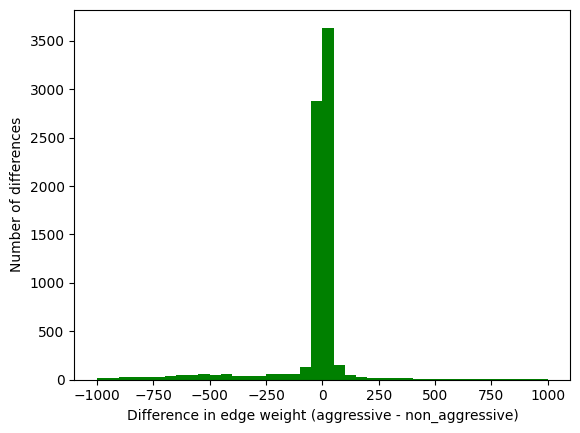

In [26]:
differences = list(df_edges_difference_weight['Difference'])
plt.hist(differences,bins=40,range=[-1000,1000],color='green')
plt.xlabel('Difference in edge weight (aggressive - non_aggressive)')
plt.ylabel('Number of differences')
plt.savefig('Density_edge_weight_difference_100_100_weighted.png')

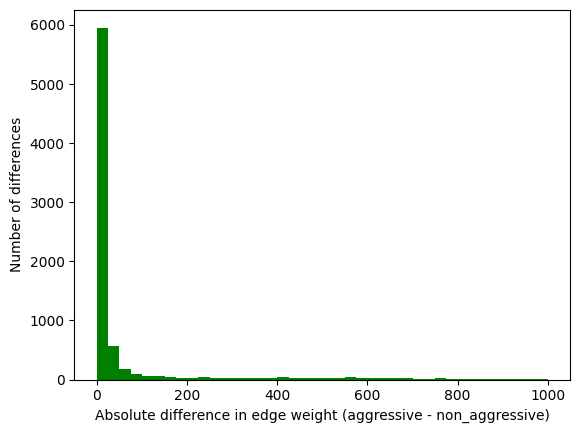

In [27]:
differences_absolute = []
for d in differences:
    if d < 0:
        differences_absolute.append(-1*d)
    else:
        differences_absolute.append(d)
plt.hist(differences_absolute,bins=40,range=[0,1000],color='green')
plt.xlabel('Absolute difference in edge weight (aggressive - non_aggressive)')
plt.ylabel('Number of differences')
plt.savefig('Density_edge_weight_absolute_difference_100_100_weighted.png')

In [44]:
filter_value = np.percentile(differences_absolute,90)
filter_value

273.2131548519096

In [45]:
len(df_edges_difference_weight.loc[(df_edges_difference_weight['Difference'] > filter_value)])+1

155

In [46]:
len(df_edges_difference_weight.loc[(df_edges_difference_weight['Difference'] < -1*filter_value)])

633

In [31]:
with open(output_file,'w') as f:
    f.write('graph = {')
    f.write('\n')
    f.write('    nodes: [')
    f.write('\n')
    for i in range(len(top_genes_together)):
        f.write('        {') 
        f.write('\n')
        f.write('            id: ' + top_genes2_together[i] + ',') 
        f.write('\n')
        try:
            f.write('            rank_aggr: ' + str(1+ranking_genes_aggr.index(top_genes_together[i])) + ',') 
        except ValueError:
            f.write('            rank_aggr: ' + str(-1) + ',') 
        f.write('\n')
        try:
            f.write('            rank_non_aggr: ' + str(1+ranking_genes_non_aggr.index(top_genes_together[i])) + ',') 
        except ValueError:
            f.write('            rank_non_aggr: ' + str(-1) + ',') 
        f.write('\n')
        f.write('        },') 
        f.write('\n')
    f.write('    ],')
    f.write('\n')
    f.write('    links: [')
    f.write('\n')
    for edge in edges_difference_weight:
        if edges_difference_weight[edge] > 0:
            f.write('        {source: "'+ edge[0] +'", target: "'+edge[1]+'", type: "pp_red", direction: "directed", max_cost: '+ str(edges_difference_weight[edge]) +', evidence: ""},')
        else:
            f.write('        {source: "'+ edge[0] +'", target: "'+edge[1]+'", type: "pp_blue", direction: "directed", max_cost: '+ str(-1*edges_difference_weight[edge]) +', evidence: ""},')
        f.write('\n')
    f.write('    ],')
    f.write('\n')
    f.write('}')
f.close()

In [32]:
def componentsFilteredEdges(edges,Filter):
    array1 = []
    for edge in edges:
        if edges[edge]>Filter:
            array1.append(edge)
    G = nx.Graph()
    G.add_edges_from(array1)
    r = list(nx.connected_components(G))
    return r

In [33]:
def writeComponents(edges,Filters):
    edges_pos = {}
    edges_neg = {}
    for e in edges:
        if edges[e]>0:
            edges_pos[e] = edges[e]
        else:
            edges_neg[e] = -1*edges[e]
    for f in Filters:
        components_pos = componentsFilteredEdges(edges_pos,f)
        components_neg = componentsFilteredEdges(edges_neg,f)
        file_pos = 'components_stronger_in_aggr_' + str(f)
        file_neg = 'components_stronger_in_non_aggr_' + str(f)
        with open(output_file_components_directory+file_pos,'w') as f:
            i = 1
            for c in components_pos:
                f.write('Component'+str(i)+': ')
                f.write(str(c))
                f.write('\n')
                i = i + 1
        f.close()
        with open(output_file_components_directory+file_neg,'w') as f:
            i = 1
            for c in components_neg:
                f.write('Component'+str(i)+': ')
                f.write(str(c))
                f.write('\n')
                i = i + 1
        f.close()

In [34]:
path = os.path.join(output_file_components_directory)
os.mkdir(path)
writeComponents(edges_difference_weight,[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12])